In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 5

In [297]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

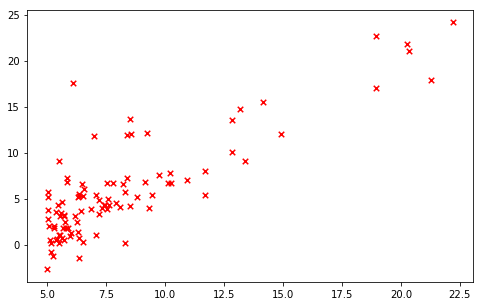

In [298]:
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=4)

# Univariate Linear Regression

In [299]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    sqErr = np.square(h-y)
    J = 1/(2*m)*np.sum(sqErr)
    
    return J

In [300]:
theta = [[0],[0]]
computeCost(X, y, theta)

32.072733877455676

In [301]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros((num_iters, 1))
    
    for i in range(0,num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[i] = computeCost(X, y, theta)
    return (theta, J_history)

In [302]:
def normalEquation(X, y):
    inv = np.linalg.inv(X.T.dot(X))
    theta = inv.dot(X.T.dot(y))
    return theta

Theta using gradient descent is: [-3.63029144  1.16636235]


(0, 1500)

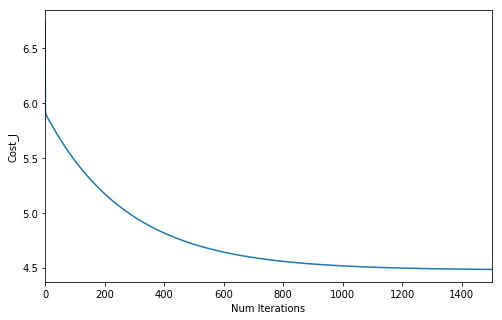

In [303]:
# using gradient descent to calcualte the value of theta
initial_theta = np.zeros((2,1))
theta, Cost_J = gradientDescent(X, y, initial_theta, num_iters=1500)
print('Theta using gradient descent is: {}'.format(theta.ravel()))

plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel('Num Iterations')
plt.xlim(0, 1500)

In [304]:
# using normal equation to calculate the value of theta
n_theta = normalEquation(X, y)
print('Theta using normal equation is: {}'.format(n_theta.ravel()))

Theta using normal equation is: [-3.89578088  1.19303364]


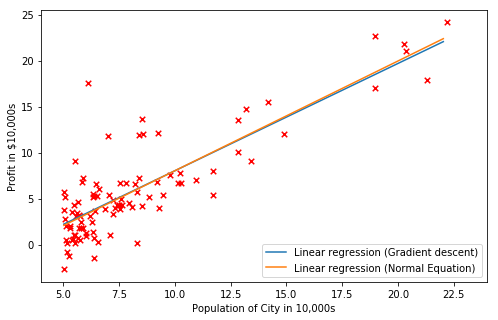

In [305]:
xx = np.arange(np.min(X[:, 1]), np.max(X[:, 1]))
yy = theta[0] + theta[1] * xx
yy_n = n_theta[0] + n_theta[1] * xx

# Plot for gradient descent
plt.scatter(X[:, 1], y, s=30, c='r', marker='x')
plt.plot(xx, yy, label='Linear regression (Gradient descent)')
plt.plot(xx, yy_n, label='Linear regression (Normal Equation)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

# Multivariate Linear Regression

In [306]:
def featureNormalize(X):
    sigma = np.std(X, axis=0)
    mu = np.mean(X, axis=0)
    return mu, sigma, ((X - mu)/sigma)

In [307]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X_scaled = np.c_[data[:, 0:2]]

# Make sure to normalize X before adding the ones column vector
mu, sigma, X = featureNormalize(X_scaled)
X = np.c_[np.ones((data.shape[0], 1)), X]
y = np.c_[data[:, 2]]

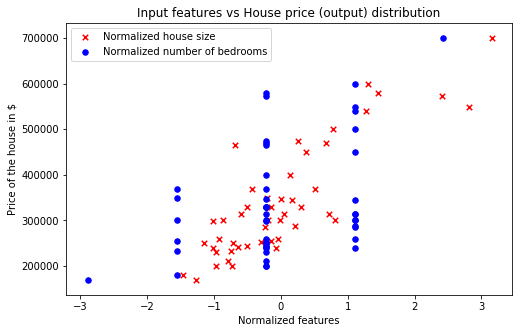

In [308]:
# Plot the scatter for the two features
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', label='Normalized house size')
plt.scatter(X[:, 2], y, s=30, c='b', marker='o', label='Normalized number of bedrooms')
plt.xlabel('Normalized features')
plt.ylabel('Price of the house in $')
plt.legend(loc=0)
plt.title('Input features vs House price (output) distribution')

Theta using gradient descent is: [ 340412.56301439  109370.05670466   -6500.61509507]


(0, 1500)

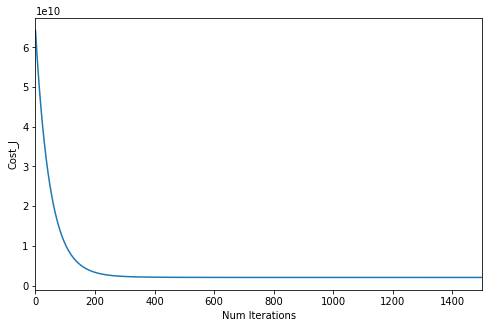

In [340]:
# using gradient descent to calcualte the value of theta
initial_theta = np.zeros((3,1))
theta, Cost_J = gradientDescent(X, y, initial_theta, num_iters=1500)
print('Theta using gradient descent is: {}'.format(theta.ravel()))

plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel('Num Iterations')
plt.xlim(0, 1500)

In [341]:
# using normal equation to calculate the value of theta
n_theta = normalEquation(X, y)
print('Theta using normal equation is: {}'.format(n_theta.ravel()))

Theta using normal equation is: [ 340412.65957447  109447.79646964   -6578.35485416]


In [342]:
def normalizeWith(X, mu, sigma):
    return (X - mu) / sigma

In [343]:
# predicting the price of a 3 bedroom 1650 sqft house
Xp = np.array([1650., 3.]).reshape(1, 2)
Xp = normalizeWith(Xp, mu, sigma)
Xp = np.c_[1., Xp]

p1 = Xp.dot(theta)
p2 = Xp.dot(n_theta)

print('The price of a 1650 sqft 3 bedroom house (using gradient descent) is: {}'.format(p1[0,0]))
print('The price of a 1650 sqft 3 bedroom house (using normal equation) is: {}'.format(p2[0,0]))

The price of a 1650 sqft 3 bedroom house (using gradient descent) is: 293098.4666757651
The price of a 1650 sqft 3 bedroom house (using normal equation) is: 293081.4643348961


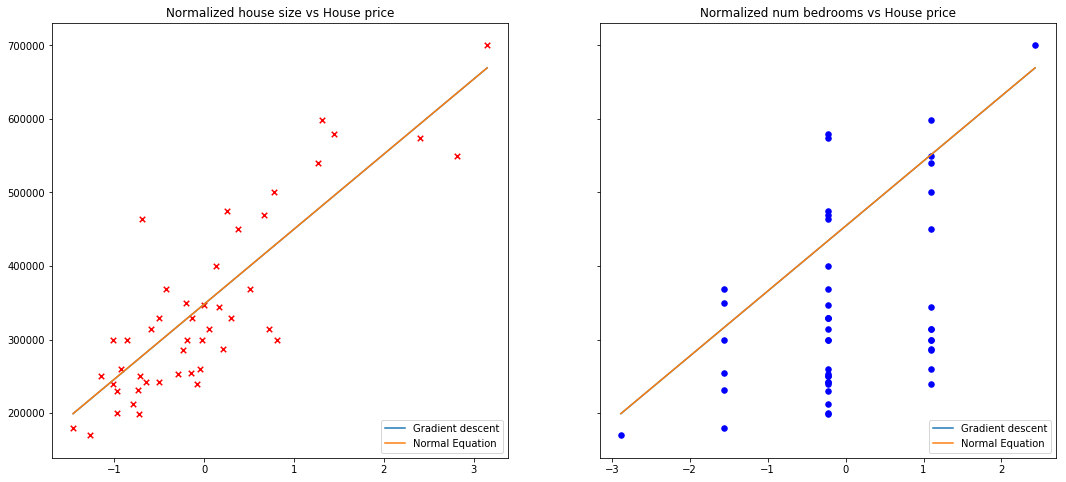

In [344]:
xx1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
xx2 = np.linspace(np.min(X[:, 2]), np.max(X[:, 2]), 10)
yy = theta[0] + theta[1] * xx1 + theta[2] * xx2
yy_n = n_theta[0] + n_theta[1] * xx1 + n_theta[2] * xx2

# Plot for gradient descent (probably not the best way to visualize a multivariate regression)
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
f.set_size_inches(18, 8)

ax1.scatter(X[:, 1], y, s=30, c='r', marker='x')
ax1.plot(xx1, yy, label='Gradient descent')
ax1.plot(xx1, yy_n, label='Normal Equation')

ax1.set_title('Normalized house size vs House price')
ax1.legend(loc=4);


ax2.scatter(X[:, 2], y, s=30, c='b', marker='o')
ax2.plot(xx2, yy, label='Gradient descent')
ax2.plot(xx2, yy_n, label='Normal Equation')

ax2.set_title('Normalized num bedrooms vs House price')
ax2.legend(loc=4);